# 生成函数，以房间数量预测房价

In [225]:
# 导入数据集
from sklearn.datasets import load_boston
import random

In [15]:
data = load_boston() # 波士顿房价数据集

In [130]:
x, y = data['data'], data['target']

In [10]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt

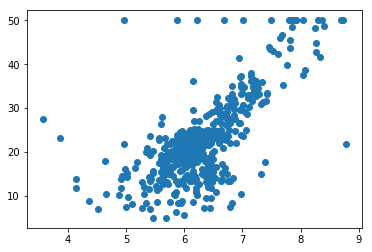

In [13]:
plt.scatter(x[:, 5], y) # numpy中数组的一种写法，表示对一个二维数组，取该二维数组第一维中的所有数据，第二维中取第0个数据， 

In [17]:
# 房间数量与房价的关系

In [20]:
def price(rm, k, b):
    """f(x) = kx + b"""
    return k * rm + b

In [171]:
x_rm = x[:,5]

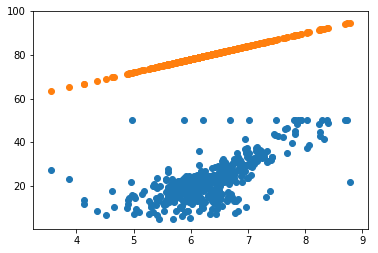

In [129]:
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_kb = [price(r, k, b) for r in x_rm]

plt.scatter(x[:, 5], y)
plt.scatter(x_rm, price_by_random_kb)

In [91]:
# 如何评价随机生成的函数？ 方差，损失值越小越好

In [5]:
# 损失越小，则函数越好
# y是实际值，y_hat是估计值
def loss(y, y_hat):
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

### 1.随机生成函数，每次都记录损失值，尝试多次，取其中最小的
###    问题在于变化不可控制，完全随机，瞎蒙

In [103]:
# 生成1万个函数，计算每个函数的loss，求出函数每个点与是实际点的差值
# 结果时好时坏
min_loss = float('inf') # 正无穷

for i in range(1000):
    # k和b取-100到100之间的随机小数
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_kb = [price(r, k, b) for r in x_rm]
    
    current_loss = loss(y, price_by_random_kb)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('Get best k {} and b {} and the loss is {} when trying {} times'.format(k,b, min_loss, i+1) )

Get best k 5.6833587363936005 and b 8.272004689923065 and the loss is 509.7632425553337 when trying 1 times
Get best k 14.148576375281664 and b -61.24598548473421 and the loss is 82.5658713656505 when trying 54 times
Get best k 5.826870011868479 and b -18.534542031377924 and the loss is 68.6669391777115 when trying 489 times
Get best k 4.018690223869299 and b -3.212603298256184 and the loss is 56.571883893291385 when trying 659 times
Get best k 4.8415232221113484 and b -9.021444144797059 and the loss is 53.81448177827227 when trying 773 times


### 2.随机生成函数，记录损失值，损失小了，合理的猜测是向着变小的方向再改变k与b
###    当前损失变小，则朝着当前方向再变一点，没变小，再随机选一个
###    问题是没变小时，又变为随机，还是在瞎猜

In [101]:
# 理论上说，尝试次数越多，损失就会越小，但尝试次数越多，花费时间也就越多，如何优化？
# 找对改变方向，持续改变，而非随意变化
# 监督改变的方向，是谓监督学习
# Direction Adjusting
min_loss = float('inf') # 正无穷
direction = [
    (+1, -1), # k's change direction, b's change direction
    (+1, +1),
    (-1, -1),
    (-1, +1)
]
trying_times = 10000

# 乘一个系数
scalar = 0.1
current_direction = random.choice(direction)
next_direction = current_direction

for i in range(trying_times):
    k_direction, b_direction = next_direction
    current_k, current_b = k + k_direction , b + b_direction
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_kb = [price(r, current_k, current_b) for r in x_rm]
    
    current_loss = loss(y, price_by_kb)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        next_direction = current_direction
        print('Get best k {} and b {} and the loss is {} when trying {} times'.format(k,b, min_loss, i+1)) 
    else:
        # 这里还可以优化，随机选还是重头开始
        # 用比喻来说，好比有个教练指导，但这个教练只能在运动员做对的时候不断鼓励，要是做错却只会让运动员重新尝试
        # 能优化对的，却不能很好地纠正错的
        next_direction = random.choice(direction)
    

Get best k 4.381031048337675 and b 76.93843279685206 and the loss is 77444.14059983431 when trying 1 times
Get best k -64.19166763545236 and b -37.710733466224 and the loss is 7658.350969747533 when trying 2 times
Get best k -71.22426796485313 and b -70.68874583975847 and the loss is 1441.4704512303113 when trying 11 times
Get best k 81.88601657428839 and b -34.64051035134972 and the loss is 98.96312582188644 when trying 25 times
Get best k 25.97459941457312 and b 3.5793337779711294 and the loss is 64.36075621676346 when trying 268 times
Get best k 48.7139231859785 and b -59.12809388998361 and the loss is 44.071569158130075 when trying 285 times


### 又有新问题
### 对于直线函数，只有kb两个参数，四种变化方向，要是有n个参数呢，变化方向就会变为n维矩阵
### 需要新方法来进行监督

### 3.引入导数
### loss是二次方程，以k与loss为xy，图像为曲线，求其偏导

## Loss
## 偏导数说明函数分别随着k和b变化时如何变化
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2 $$
$$ loss = \frac{1}{n} \sum{(y_i - (kx_i  + b_i))}^2$$
$$ \frac{\partial loss} {\partial{k}} = -\frac{2}{n} \sum{(y_i - (kx_i + b))x_i} $$
                       $$  = -\frac{2}{n} \sum{(y_i - \hat{y_i})x_i}  $$
$$ \frac{\partial loss} {\partial{b}} = -\frac{2}{n} \sum{(y_i - (kx_i + b))} $$
                       $$  = -\frac{2}{n} \sum{(y_i - \hat{y_i})} $$

In [188]:
# 转为程序表示
def partial_k(x, y, y_hat):
    n = len(y)
    return  (-2 / n) * sum( (y_i - y_hat_i) * x_i for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)))

In [186]:
def partial_b(x, y, y_hat):
    n = len(y)
    return (-2 / n) * sum( (y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat)) )

In [223]:
# 初始化最小损失值，尝试次数，以及初始的k和b
min_loss = float('inf') # 正无穷
trying_times = 10000
current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

# 学习速率
learning_rate = 0.001

for i in range(trying_times):
    
    # 当前k和b计算而来的y值，即y_hat
    price_by_kb = [price(r, current_k, current_b) for r in x_rm]
    # 当前函数的损失值
    current_loss = loss(y, price_by_kb)
    
    if current_loss < min_loss:
        min_loss = current_loss
        print('Get best k {} and b {} and the loss is {} when trying {} times'.format(current_k, current_b, min_loss, i+1)) 
   
    # 注意这里的第一个参数是x_rm，
    k_direction, b_direction = partial_k(x_rm, y, price_by_kb), partial_b(x_rm,y, price_by_kb)    
    # 为什么要乘以一个很小的系数
    # 考虑这样的情况，如果函数陡峭，某一点的导数可能很大，向反方向变化，有可能仍然和最小点距离很远，所以就要一点点变
    # 这就是学习速率
    # 其实还有优化空间：让学习速率本身也是可变化的，导数大的时候，速率就小些；等导数小了，学习速率再变大些
    current_k = current_k + (-1 * k_direction) * learning_rate
    current_b = current_b + (-1 * b_direction) * learning_rate

Get best k 86.8569727515517 and b 96.36472894897824 and the loss is 387045.77688879636 when trying 1 times
Get best k 78.99122524896573 and b 95.12533646825715 and the loss is 326237.9089886165 when trying 2 times
Get best k 71.77014786377373 and b 93.98728946697145 and the loss is 274988.58955989825 when trying 3 times
Get best k 65.14090691223835 and b 92.94228222218574 and the loss is 231795.28506548094 when trying 4 times
Get best k 59.05499867414359 and b 91.98268970318172 and the loss is 195391.64919235616 when trying 5 times
Get best k 53.46789453235793 and b 91.1015117855985 and the loss is 164710.3959566756 when trying 6 times
Get best k 48.33871519484319 and b 90.29232203748082 and the loss is 138852.0088836672 when trying 7 times
Get best k 43.62993161566909 and b 89.54922070254625 and the loss is 117058.36887439054 when trying 8 times
Get best k 39.307090426926955 and b 88.8667915366901 and the loss is 98690.52757792866 when trying 9 times
Get best k 35.338561872761616 and 

Get best k -9.020802842460151 and b 80.61136084617276 and the loss is 207.34262752694715 when trying 240 times
Get best k -9.020367047172696 and b 80.60858863261913 and the loss is 207.33475253611445 when trying 241 times
Get best k -9.019931261506402 and b 80.60581648586451 and the loss is 207.3268779240208 when trying 242 times
Get best k -9.019495485531396 and b 80.60304440589623 and the loss is 207.31900369064797 when trying 243 times
Get best k -9.019059719312036 and b 80.60027239270252 and the loss is 207.31112983597706 when trying 244 times
Get best k -9.01862396290739 and b 80.59750044627248 and the loss is 207.30325635999085 when trying 245 times
Get best k -9.018188216371657 and b 80.59472856659592 and the loss is 207.29538326267007 when trying 246 times
Get best k -9.017752479754579 and b 80.59195675366338 and the loss is 207.28751054399729 when trying 247 times
Get best k -9.017316753101799 and b 80.58918500746606 and the loss is 207.27963820395416 when trying 248 times
Get

Get best k -8.919542954377171 and b 79.96723391501654 and the loss is 205.51795341213744 when trying 473 times
Get best k -8.919109583633768 and b 79.9644771925758 and the loss is 205.51016617695274 when trying 474 times
Get best k -8.918676223311728 and b 79.9617205364266 and the loss is 205.50237931628644 when trying 475 times
Get best k -8.918242873410803 and b 79.95896394656732 and the loss is 205.4945928301203 when trying 476 times
Get best k -8.91780953393074 and b 79.9562074229964 and the loss is 205.48680671843647 when trying 477 times
Get best k -8.91737620487129 and b 79.95345096571222 and the loss is 205.47902098121713 when trying 478 times
Get best k -8.916942886232203 and b 79.9506945747132 and the loss is 205.47123561844404 when trying 479 times
Get best k -8.916509578013226 and b 79.94793824999772 and the loss is 205.46345063009898 when trying 480 times
Get best k -8.916076280214112 and b 79.94518199156421 and the loss is 205.45566601616417 when trying 481 times
Get best

Get best k -8.831350758520793 and b 79.4062329496413 and the loss is 203.93708715874217 when trying 677 times
Get best k -8.830919508555086 and b 79.40348971771778 and the loss is 203.9293759535406 when trying 678 times
Get best k -8.830488268959744 and b 79.40074655176136 and the loss is 203.92166511920078 when trying 679 times
Get best k -8.83005703973452 and b 79.39800345177048 and the loss is 203.9139546557047 when trying 680 times
Get best k -8.829625820879162 and b 79.39526041774354 and the loss is 203.90624456303485 when trying 681 times
Get best k -8.82919461239342 and b 79.39251744967898 and the loss is 203.89853484117327 when trying 682 times
Get best k -8.828763414277047 and b 79.38977454757517 and the loss is 203.89082549010212 when trying 683 times
Get best k -8.828332226529792 and b 79.38703171143057 and the loss is 203.88311650980333 when trying 684 times
Get best k -8.827901049151407 and b 79.38428894124355 and the loss is 203.87540790025943 when trying 685 times
Get be

Get best k -8.768068168722493 and b 79.00368492797618 and the loss is 202.80751047638535 when trying 824 times
Get best k -8.767638440527548 and b 79.00095137621605 and the loss is 202.7998535969028 when trying 825 times
Get best k -8.767208722666375 and b 78.99821789019025 and the loss is 202.79219708566947 when trying 826 times
Get best k -8.766779015138724 and b 78.9954844698972 and the loss is 202.78454094266743 when trying 827 times
Get best k -8.766349317944346 and b 78.99275111533534 and the loss is 202.77688516787885 when trying 828 times
Get best k -8.765919631082994 and b 78.99001782650306 and the loss is 202.76922976128617 when trying 829 times
Get best k -8.76548995455442 and b 78.9872846033988 and the loss is 202.76157472287167 when trying 830 times
Get best k -8.765060288358374 and b 78.98455144602099 and the loss is 202.7539200526178 when trying 831 times
Get best k -8.764630632494608 and b 78.98181835436802 and the loss is 202.7462657505062 when trying 832 times
Get bes

Get best k -8.728576400763895 and b 78.75247313158064 and the loss is 202.10461683261065 when trying 916 times
Get best k -8.728147622236433 and b 78.74974562076744 and the loss is 202.09699375800693 when trying 917 times
Get best k -8.727718854019905 and b 78.7470181755433 and the loss is 202.08937105002627 when trying 918 times
Get best k -8.727290096114062 and b 78.74429079590666 and the loss is 202.08174870865133 when trying 919 times
Get best k -8.726861348518659 and b 78.74156348185593 and the loss is 202.07412673386426 when trying 920 times
Get best k -8.726432611233447 and b 78.73883623338955 and the loss is 202.06650512564767 when trying 921 times
Get best k -8.726003884258176 and b 78.73610905050592 and the loss is 202.05888388398373 when trying 922 times
Get best k -8.7255751675926 and b 78.73338193320348 and the loss is 202.051263008854 when trying 923 times
Get best k -8.725146461236472 and b 78.73065488148065 and the loss is 202.0436425002428 when trying 924 times
Get bes

Get best k -8.591041230078638 and b 77.87759568037026 and the loss is 199.66883743441957 when trying 1238 times
Get best k -8.590615758890557 and b 77.87488920793317 and the loss is 199.66133150588436 when trying 1239 times
Get best k -8.590190297933878 and b 77.87218280057922 and the loss is 199.65382593833837 when trying 1240 times
Get best k -8.589764847208356 and b 77.86947645830686 and the loss is 199.64632073176435 when trying 1241 times
Get best k -8.589339406713743 and b 77.86677018111453 and the loss is 199.63881588614458 when trying 1242 times
Get best k -8.588913976449794 and b 77.86406396900067 and the loss is 199.63131140146206 when trying 1243 times
Get best k -8.588488556416262 and b 77.8613578219637 and the loss is 199.6238072776993 when trying 1244 times
Get best k -8.588063146612903 and b 77.85865174000205 and the loss is 199.61630351483862 when trying 1245 times
Get best k -8.58763774703947 and b 77.85594572311416 and the loss is 199.60880011286318 when trying 1246 t

Get best k -8.46765982999544 and b 77.09275203424153 and the loss is 197.49977384278068 when trying 1529 times
Get best k -8.467237325787815 and b 77.09006443511724 and the loss is 197.4923722329176 when trying 1530 times
Get best k -8.466814831740244 and b 77.08737690062226 and the loss is 197.48497097902643 when trying 1531 times
Get best k -8.466392347852484 and b 77.08468943075502 and the loss is 197.47757008109036 when trying 1532 times
Get best k -8.465969874124289 and b 77.08200202551399 and the loss is 197.47016953909198 when trying 1533 times
Get best k -8.465547410555414 and b 77.0793146848976 and the loss is 197.46276935301472 when trying 1534 times
Get best k -8.465124957145617 and b 77.07662740890429 and the loss is 197.45536952284078 when trying 1535 times
Get best k -8.464702513894654 and b 77.07394019753251 and the loss is 197.44797004855332 when trying 1536 times
Get best k -8.46428008080228 and b 77.07125305078071 and the loss is 197.44057093013518 when trying 1537 ti

Get best k -8.403555647153821 and b 76.6849777622719 and the loss is 196.3788044734191 when trying 1681 times
Get best k -8.403134684473992 and b 76.68229996898783 and the loss is 196.37145677531606 when trying 1682 times
Get best k -8.402713731917148 and b 76.67962224009727 and the loss is 196.36410943059218 when trying 1683 times
Get best k -8.402292789483043 and b 76.67694457559865 and the loss is 196.35676243923066 when trying 1684 times
Get best k -8.401871857171438 and b 76.67426697549044 and the loss is 196.3494158012142 when trying 1685 times
Get best k -8.401450934982087 and b 76.67158943977108 and the loss is 196.34206951652664 when trying 1686 times
Get best k -8.401030022914748 and b 76.66891196843903 and the loss is 196.3347235851499 when trying 1687 times
Get best k -8.400609120969175 and b 76.66623456149274 and the loss is 196.32737800706735 when trying 1688 times
Get best k -8.400188229145128 and b 76.66355721893066 and the loss is 196.32003278226225 when trying 1689 ti

Get best k -8.359409791663602 and b 76.40416076586035 and the loss is 195.6092224413609 when trying 1786 times
Get best k -8.358989890569152 and b 76.40148972544617 and the loss is 195.60191175543946 when trying 1787 times
Get best k -8.35856999957216 and b 76.39881874926309 and the loss is 195.594601421117 when trying 1788 times
Get best k -8.35815011867238 and b 76.39614783730957 and the loss is 195.58729143837726 when trying 1789 times
Get best k -8.357730247869572 and b 76.39347698958409 and the loss is 195.57998180720284 when trying 1790 times
Get best k -8.357310387163492 and b 76.39080620608509 and the loss is 195.57267252757677 when trying 1791 times
Get best k -8.356890536553898 and b 76.38813548681102 and the loss is 195.56536359948214 when trying 1792 times
Get best k -8.356470696040546 and b 76.38546483176034 and the loss is 195.55805502290235 when trying 1793 times
Get best k -8.356050865623194 and b 76.38279424093152 and the loss is 195.5507467978204 when trying 1794 time

Get best k -8.289007866627369 and b 75.95632581259625 and the loss is 194.38594634065313 when trying 1954 times
Get best k -8.288589658503946 and b 75.95366554137055 and the loss is 194.37869448681863 when trying 1955 times
Get best k -8.288171460437269 and b 75.951005334117 and the loss is 194.37144298175426 when trying 1956 times
Get best k -8.287753272427095 and b 75.94834519083405 and the loss is 194.36419182544273 when trying 1957 times
Get best k -8.287335094473182 and b 75.94568511152016 and the loss is 194.35694101786746 when trying 1958 times
Get best k -8.286916926575289 and b 75.94302509617381 and the loss is 194.3496905590117 when trying 1959 times
Get best k -8.286498768733175 and b 75.94036514479345 and the loss is 194.34244044885818 when trying 1960 times
Get best k -8.286080620946597 and b 75.93770525737754 and the loss is 194.33519068739088 when trying 1961 times
Get best k -8.285662483215313 and b 75.93504543392456 and the loss is 194.32794127459272 when trying 1962 t

Get best k -8.171470741326988 and b 75.208658288042 and the loss is 192.35468034466498 when trying 2236 times
Get best k -8.171055359645424 and b 75.2060159961465 and the loss is 192.34752618228242 when trying 2237 times
Get best k -8.170639987952635 and b 75.2033737677908 and the loss is 192.34037236397137 when trying 2238 times
Get best k -8.170224626248384 and b 75.20073160297335 and the loss is 192.33321888971489 when trying 2239 times
Get best k -8.16980927453243 and b 75.19808950169264 and the loss is 192.32606575949708 when trying 2240 times
Get best k -8.169393932804532 and b 75.19544746394713 and the loss is 192.31891297330063 when trying 2241 times
Get best k -8.16897860106445 and b 75.1928054897353 and the loss is 192.31176053110977 when trying 2242 times
Get best k -8.168563279311947 and b 75.19016357905564 and the loss is 192.30460843290754 when trying 2243 times
Get best k -8.168147967546778 and b 75.18752173190659 and the loss is 192.2974566786774 when trying 2244 times


Get best k -8.03864493583918 and b 74.36373766460329 and the loss is 190.07577569906144 when trying 2557 times
Get best k -8.038232748249825 and b 74.36111569070528 and the loss is 190.06873113803286 when trying 2558 times
Get best k -8.037820570572439 and b 74.35849377985846 and the loss is 190.0616869158045 when trying 2559 times
Get best k -8.037408402806783 and b 74.35587193206133 and the loss is 190.0546430323601 when trying 2560 times
Get best k -8.036996244952617 and b 74.35325014731237 and the loss is 190.0475994876833 when trying 2561 times
Get best k -8.036584097009705 and b 74.35062842561005 and the loss is 190.04055628175783 when trying 2562 times
Get best k -8.036171958977807 and b 74.34800676695288 and the loss is 190.03351341456772 when trying 2563 times
Get best k -8.035759830856685 and b 74.34538517133932 and the loss is 190.0264708860961 when trying 2564 times
Get best k -8.035347712646102 and b 74.34276363876786 and the loss is 190.01942869632663 when trying 2565 tim

Get best k -7.965431468119284 and b 73.89801815653917 and the loss is 188.82716592896247 when trying 2735 times
Get best k -7.96502104111076 and b 73.89540738190358 and the loss is 188.82018141841556 when trying 2736 times
Get best k -7.9646106239718675 and b 73.89279667004989 and the loss is 188.81319724378037 when trying 2737 times
Get best k -7.964200216702368 and b 73.89018602097657 and the loss is 188.80621340504158 when trying 2738 times
Get best k -7.963789819302026 and b 73.88757543468212 and the loss is 188.79922990218273 when trying 2739 times
Get best k -7.963379431770602 and b 73.88496491116503 and the loss is 188.7922467351872 when trying 2740 times
Get best k -7.962969054107861 and b 73.88235445042379 and the loss is 188.7852639040395 when trying 2741 times
Get best k -7.962558686313563 and b 73.87974405245689 and the loss is 188.77828140872325 when trying 2742 times
Get best k -7.962148328387473 and b 73.87713371726282 and the loss is 188.7712992492222 when trying 2743 t

Get best k -7.81872059337374 and b 72.9647729689794 and the loss is 186.34118968105966 when trying 3094 times
Get best k -7.8183136943548295 and b 72.96218463630208 and the loss is 186.3343247307421 when trying 3095 times
Get best k -7.817906805120712 and b 72.95959636586699 and the loss is 186.32746011058669 when trying 3096 times
Get best k -7.817499925671152 and b 72.95700815767262 and the loss is 186.3205958205773 when trying 3097 times
Get best k -7.8170930560059135 and b 72.95442001171747 and the loss is 186.3137318606983 when trying 3098 times
Get best k -7.8166861961247625 and b 72.95183192800006 and the loss is 186.30686823093376 when trying 3099 times
Get best k -7.816279346027462 and b 72.94924390651889 and the loss is 186.3000049312679 when trying 3100 times
Get best k -7.815872505713779 and b 72.94665594727246 and the loss is 186.29314196168446 when trying 3101 times
Get best k -7.815465675183477 and b 72.94406805025928 and the loss is 186.28627932216767 when trying 3102 t

Get best k -7.62815012516504 and b 71.75253173154393 and the loss is 183.14406884573222 when trying 3565 times
Get best k -7.627747808837315 and b 71.74997254990605 and the loss is 183.13735765734265 when trying 3566 times
Get best k -7.627345502184181 and b 71.74741342980938 and the loss is 183.13064679172044 when trying 3567 times
Get best k -7.626943205205407 and b 71.74485437125247 and the loss is 183.12393624884936 when trying 3568 times
Get best k -7.62654091790076 and b 71.74229537423382 and the loss is 183.11722602871438 when trying 3569 times
Get best k -7.626138640270007 and b 71.73973643875195 and the loss is 183.1105161313 when trying 3570 times
Get best k -7.625736372312915 and b 71.73717756480536 and the loss is 183.10380655659063 when trying 3571 times
Get best k -7.625334114029251 and b 71.7346187523926 and the loss is 183.0970973045705 when trying 3572 times
Get best k -7.624931865418784 and b 71.7320600015122 and the loss is 183.09038837522456 when trying 3573 times
G

Get best k -7.5606965168756375 and b 71.32345136903633 and the loss is 182.02110494707176 when trying 3733 times
Get best k -7.5602958226201 and b 71.32090250559106 and the loss is 182.01444776636725 when trying 3734 times
Get best k -7.559895138000148 and b 71.31835370343889 and the loss is 182.0077909058322 when trying 3735 times
Get best k -7.55949446301555 and b 71.31580496257833 and the loss is 182.001134365451 when trying 3736 times
Get best k -7.559093797666074 and b 71.31325628300792 and the loss is 181.994478145209 when trying 3737 times
Get best k -7.558693141951489 and b 71.31070766472618 and the loss is 181.98782224509034 when trying 3738 times
Get best k -7.558292495871561 and b 71.30815910773164 and the loss is 181.98116666507943 when trying 3739 times
Get best k -7.557891859426061 and b 71.30561061202283 and the loss is 181.97451140516162 when trying 3740 times
Get best k -7.557491232614756 and b 71.30306217759828 and the loss is 181.96785646532086 when trying 3741 times

Get best k -7.4079333412193655 and b 70.35170678115334 and the loss is 179.49468370019233 when trying 4116 times
Get best k -7.407536320494492 and b 70.34918128547012 and the loss is 179.4881480248739 when trying 4117 times
Get best k -7.407139309316865 and b 70.34665585051808 and the loss is 179.48161266388126 when trying 4118 times
Get best k -7.406742307686256 and b 70.34413047629573 and the loss is 179.4750776171995 when trying 4119 times
Get best k -7.406345315602436 and b 70.34160516280164 and the loss is 179.4685428848135 when trying 4120 times
Get best k -7.405948333065173 and b 70.33907991003433 and the loss is 179.4620084667079 when trying 4121 times
Get best k -7.40555136007424 and b 70.33655471799234 and the loss is 179.45547436286822 when trying 4122 times
Get best k -7.405154396629405 and b 70.33402958667422 and the loss is 179.44894057327858 when trying 4123 times
Get best k -7.404757442730441 and b 70.33150451607851 and the loss is 179.44240709792433 when trying 4124 ti

Get best k -7.239663847079889 and b 69.281324671503 and the loss is 176.73874793878426 when trying 4542 times
Get best k -7.239270872769629 and b 69.27882491554067 and the loss is 176.7323448070942 when trying 4543 times
Get best k -7.238877907909312 and b 69.27632521969053 and the loss is 176.72594198335554 when trying 4544 times
Get best k -7.238484952498709 and b 69.27382558395115 and the loss is 176.7195394675535 when trying 4545 times
Get best k -7.238092006537594 and b 69.27132600832107 and the loss is 176.7131372596733 when trying 4546 times
Get best k -7.23769907002574 and b 69.26882649279885 and the loss is 176.7067353597001 when trying 4547 times
Get best k -7.237306142962919 and b 69.26632703738305 and the loss is 176.70033376761887 when trying 4548 times
Get best k -7.236913225348904 and b 69.26382764207221 and the loss is 176.69393248341538 when trying 4549 times
Get best k -7.236520317183468 and b 69.26132830686491 and the loss is 176.6875315070739 when trying 4550 times


Get best k -7.165168146438397 and b 68.80744872850872 and the loss is 175.52766555810783 when trying 4732 times
Get best k -7.1647769635431136 and b 68.80496036794845 and the loss is 175.52132067206162 when trying 4733 times
Get best k -7.164385790054694 and b 68.80247206722636 and the loss is 175.51497609116598 when trying 4734 times
Get best k -7.1639946259729115 and b 68.79998382634099 and the loss is 175.50863181540515 when trying 4735 times
Get best k -7.163603471297541 and b 68.79749564529092 and the loss is 175.5022878447658 when trying 4736 times
Get best k -7.163212326028355 and b 68.7950075240747 and the loss is 175.4959441792322 when trying 4737 times
Get best k -7.162821190165128 and b 68.79251946269089 and the loss is 175.4896008187901 when trying 4738 times
Get best k -7.1624300637076335 and b 68.79003146113806 and the loss is 175.4832577634247 when trying 4739 times
Get best k -7.162038946655645 and b 68.78754351941475 and the loss is 175.4769150131217 when trying 4740 t

Get best k -6.97113205141432 and b 67.5731622299231 and the loss is 172.39918233436023 when trying 5231 times
Get best k -6.970745534548935 and b 67.57070355052966 and the loss is 172.39298790919338 when trying 5232 times
Get best k -6.970359026978208 and b 67.56824493026063 and the loss is 172.38679378194058 when trying 5233 times
Get best k -6.969972528701916 and b 67.5657863691146 and the loss is 172.38059995258735 when trying 5234 times
Get best k -6.969586039719836 and b 67.56332786709015 and the loss is 172.37440642111926 when trying 5235 times
Get best k -6.969199560031744 and b 67.56086942418585 and the loss is 172.36821318752237 when trying 5236 times
Get best k -6.9688130896374165 and b 67.55841104040029 and the loss is 172.3620202517818 when trying 5237 times
Get best k -6.96842662853663 and b 67.55595271573203 and the loss is 172.35582761388363 when trying 5238 times
Get best k -6.96804017672916 and b 67.55349445017967 and the loss is 172.34963527381345 when trying 5239 tim

Get best k -6.784758074400421 and b 66.38761536820434 and the loss is 169.42958309858432 when trying 5716 times
Get best k -6.784376039312248 and b 66.38518519792463 and the loss is 169.42353149295033 when trying 5717 times
Get best k -6.783994013410958 and b 66.38275508608378 and the loss is 169.41748017836164 when trying 5718 times
Get best k -6.783611996696333 and b 66.38032503268037 and the loss is 169.41142915480432 when trying 5719 times
Get best k -6.78322998916815 and b 66.37789503771302 and the loss is 169.40537842226357 when trying 5720 times
Get best k -6.782847990826188 and b 66.3754651011803 and the loss is 169.39932798072624 when trying 5721 times
Get best k -6.782466001670226 and b 66.3730352230808 and the loss is 169.39327783017842 when trying 5722 times
Get best k -6.782084021700045 and b 66.37060540341315 and the loss is 169.3872279706053 when trying 5723 times
Get best k -6.781702050915422 and b 66.36817564217591 and the loss is 169.3811784019936 when trying 5724 tim

Get best k -6.589598291447661 and b 65.14618095809837 and the loss is 166.35711645790934 when trying 6230 times
Get best k -6.589220949410964 and b 65.14378064087293 and the loss is 166.3512126191005 when trying 6231 times
Get best k -6.588843616448297 and b 65.14138038136846 and the loss is 166.34530906422967 when trying 6232 times
Get best k -6.58846629255944 and b 65.13898017958358 and the loss is 166.3394057932841 when trying 6233 times
Get best k -6.588088977744177 and b 65.13658003551689 and the loss is 166.33350280624947 when trying 6234 times
Get best k -6.587711672002289 and b 65.134179949167 and the loss is 166.32760010311233 when trying 6235 times
Get best k -6.587334375333557 and b 65.13177992053254 and the loss is 166.32169768385916 when trying 6236 times
Get best k -6.586957087737764 and b 65.1293799496121 and the loss is 166.3157955484762 when trying 6237 times
Get best k -6.58657980921469 and b 65.12698003640432 and the loss is 166.3098936969494 when trying 6238 times
G

Get best k -6.419214726749488 and b 64.06235099614337 and the loss is 163.7057608884081 when trying 6684 times
Get best k -6.418841481964939 and b 64.05997674202234 and the loss is 163.6999845635608 when trying 6685 times
Get best k -6.418468246155891 and b 64.05760254499555 and the loss is 163.69420851651958 when trying 6686 times
Get best k -6.41809501932213 and b 64.05522840506161 and the loss is 163.6884327472707 when trying 6687 times
Get best k -6.417721801463438 and b 64.05285432221916 and the loss is 163.68265725580073 when trying 6688 times
Get best k -6.417348592579601 and b 64.05048029646682 and the loss is 163.6768820420967 when trying 6689 times
Get best k -6.416975392670403 and b 64.0481063278032 and the loss is 163.67110710614523 when trying 6690 times
Get best k -6.416602201735627 and b 64.04573241622694 and the loss is 163.66533244793285 when trying 6691 times
Get best k -6.4162290197750576 and b 64.04335856173668 and the loss is 163.65955806744597 when trying 6692 tim

Get best k -6.217121075192305 and b 62.77680942958102 and the loss is 160.59848962033442 when trying 7229 times
Get best k -6.21675269019954 and b 62.774466089169046 and the loss is 160.59286273620137 when trying 7230 times
Get best k -6.216384314065412 and b 62.772122805107905 and the loss is 160.58723612268696 when trying 7231 times
Get best k -6.216015946789708 and b 62.76977957739625 and the loss is 160.5816097797782 when trying 7232 times
Get best k -6.2156475883722155 and b 62.76743640603272 and the loss is 160.57598370746229 when trying 7233 times
Get best k -6.215279238812721 and b 62.765093291015965 and the loss is 160.57035790572573 when trying 7234 times
Get best k -6.214910898111013 and b 62.76275023234463 and the loss is 160.564732374556 when trying 7235 times
Get best k -6.214542566266876 and b 62.76040723001735 and the loss is 160.55910711393977 when trying 7236 times
Get best k -6.214174243280098 and b 62.758064284032784 and the loss is 160.55348212386403 when trying 72

Get best k -6.039125964685294 and b 61.64456152649992 and the loss is 157.89547165592163 when trying 7715 times
Get best k -6.038761859981241 and b 61.64224541350956 and the loss is 157.88997477039504 when trying 7716 times
Get best k -6.038397764032896 and b 61.6399293562153 and the loss is 157.88447814923518 when trying 7717 times
Get best k -6.038033676840049 and b 61.63761335461579 and the loss is 157.8789817924294 when trying 7718 times
Get best k -6.0376695984024895 and b 61.63529740870969 and the loss is 157.87348569996414 when trying 7719 times
Get best k -6.037305528720006 and b 61.63298151849567 and the loss is 157.8679898718275 when trying 7720 times
Get best k -6.036941467792389 and b 61.63066568397238 and the loss is 157.86249430800677 when trying 7721 times
Get best k -6.036577415619428 and b 61.62834990513849 and the loss is 157.85699900848883 when trying 7722 times
Get best k -6.036213372200912 and b 61.626034181992665 and the loss is 157.85150397326095 when trying 7723

Get best k -5.853485425645967 and b 60.46368015029019 and the loss is 155.11000542758697 when trying 8228 times
Get best k -5.853125785081978 and b 60.46139243422158 and the loss is 155.10464250592386 when trying 8229 times
Get best k -5.852766153166346 and b 60.4591047731662 and the loss is 155.09927984218405 when trying 8230 times
Get best k -5.852406529898865 and b 60.45681716712273 and the loss is 155.09391743635558 when trying 8231 times
Get best k -5.852046915279325 and b 60.454529616089836 and the loss is 155.088555288426 when trying 8232 times
Get best k -5.85168730930752 and b 60.452242120066195 and the loss is 155.0831933983829 when trying 8233 times
Get best k -5.851327711983241 and b 60.44995467905049 and the loss is 155.07783176621396 when trying 8234 times
Get best k -5.85096812330628 and b 60.4476672930414 and the loss is 155.0724703919067 when trying 8235 times
Get best k -5.850608543276429 and b 60.4453799620376 and the loss is 155.0671092754485 when trying 8236 times


Get best k -5.687893403794678 and b 59.41032975783266 and the loss is 152.6543556613861 when trying 8691 times
Get best k -5.68753774525952 and b 59.40806737191938 and the loss is 152.64911084143435 when trying 8692 times
Get best k -5.687182095276964 and b 59.4058050404102 and the loss is 152.64386627372613 when trying 8693 times
Get best k -5.686826453846804 and b 59.40354276330382 and the loss is 152.63862195824944 when trying 8694 times
Get best k -5.686470820968833 and b 59.401280540598925 and the loss is 152.6333778949926 when trying 8695 times
Get best k -5.686115196642847 and b 59.399018372294215 and the loss is 152.6281340839429 when trying 8696 times
Get best k -5.685759580868639 and b 59.39675625838838 and the loss is 152.62289052508834 when trying 8697 times
Get best k -5.685403973646005 and b 59.39449419888011 and the loss is 152.61764721841695 when trying 8698 times
Get best k -5.685048374974738 and b 59.392232193768095 and the loss is 152.61240416391624 when trying 8699 

Get best k -5.605963065548745 and b 58.88916120767733 and the loss is 151.44947857407567 when trying 8922 times
Get best k -5.605609377210977 and b 58.88691135442214 and the loss is 151.44429170133134 when trying 8923 times
Get best k -5.605255697378433 and b 58.88466155526968 and the loss is 151.43910507804358 when trying 8924 times
Get best k -5.604902026050907 and b 58.88241181021865 and the loss is 151.4339187042006 when trying 8925 times
Get best k -5.604548363228196 and b 58.880162119267744 and the loss is 151.42873257979093 when trying 8926 times
Get best k -5.604194708910095 and b 58.877912482415674 and the loss is 151.4235467048014 when trying 8927 times
Get best k -5.603841063096399 and b 58.87566289966113 and the loss is 151.41836107922117 when trying 8928 times
Get best k -5.603487425786905 and b 58.873413371002805 and the loss is 151.41317570303755 when trying 8929 times
Get best k -5.603133796981407 and b 58.871163896439406 and the loss is 151.40799057623886 when trying 8

Get best k -5.498481468758763 and b 58.20545808662742 and the loss is 149.87899123207063 when trying 9227 times
Get best k -5.498130365055283 and b 58.20322467453594 and the loss is 149.87387989014726 when trying 9228 times
Get best k -5.497779269794872 and b 58.20099131615183 and the loss is 149.8687687940481 when trying 9229 times
Get best k -5.497428182977329 and b 58.19875801147379 and the loss is 149.86365794376115 when trying 9230 times
Get best k -5.497077104602449 and b 58.19652476050054 and the loss is 149.85854733927522 when trying 9231 times
Get best k -5.496726034670031 and b 58.19429156323078 and the loss is 149.8534369805775 when trying 9232 times
Get best k -5.496374973179871 and b 58.19205841966321 and the loss is 149.84832686765748 when trying 9233 times
Get best k -5.496023920131766 and b 58.189825329796555 and the loss is 149.8432170005019 when trying 9234 times
Get best k -5.495672875525513 and b 58.18759229362952 and the loss is 149.83810737909994 when trying 9235 

Get best k -5.324325613803642 and b 57.097632141181215 and the loss is 147.35873360378275 when trying 9726 times
Get best k -5.323978698065426 and b 57.09542536923101 and the loss is 147.35374347081313 when trying 9727 times
Get best k -5.323631790669571 and b 57.09321865034755 and the loss is 147.34875357783866 when trying 9728 times
Get best k -5.323284891615877 and b 57.09101198452956 and the loss is 147.34376392484722 when trying 9729 times
Get best k -5.322938000904144 and b 57.088805371775756 and the loss is 147.33877451182738 when trying 9730 times
Get best k -5.32259111853417 and b 57.08659881208487 and the loss is 147.33378533876805 when trying 9731 times
Get best k -5.322244244505755 and b 57.08439230545563 and the loss is 147.3287964056574 when trying 9732 times
Get best k -5.321897378818698 and b 57.08218585188675 and the loss is 147.32380771248376 when trying 9733 times
Get best k -5.3215505214727985 and b 57.07997945137696 and the loss is 147.3188192592357 when trying 973

## 仍然存在的问题
### 1.线性变化是对问题的过度简化，如从飞机到飞机模型，永远不会准确。模型是不是足够复杂，来拟合真实情况？
### 2.离群值影响预测。outlier会影响训练对loss的判断，进而影响训练结果。异常点应当剔除。


## 房价预测模型中反映的机器学习研究热点
### 1.初始化问题 Initialization
### 2.模型函数如何定义，当下数据和未知数据
### 3.损失值如何定义？
### 4.如何快速求导
### 5.Regularization
### 6.学习速率如何优化 Optimizer

# 动态规划 Dynamic Programming
### Programming 在40年代意为查表，所谓动态规划就是不断查表

### 切钢筋问题，怎么切最赚钱
### 找出所有可能的组合，比出其中最大的
### 假如有4米钢筋，只会有以下切法（即和为4的所有正整数组合）：
### 1.1和3 
### 2.2和2
### 3.不切
### 而每种切法各自又可再拆分，可有公式如下：

$$ r_n = max(p_n, r_1+r_{n-1},r_2+r_{n-2}, ..., r_{n-1}+r_1) $$

In [231]:
from collections import defaultdict

price_by_meter = [1,5,8,9,10,17,17,20,24,30]
price = defaultdict(int)
for counter, p  in enumerate(price_by_meter):
    price[counter+1] = p

In [241]:
# 将等式
def r(n):
    return max(
            [ price[n] ] + [ r(i) + r(n-i) for i in range(1,n) ] 
    )

### 问题是当n稍微大一些时，结果返回得很慢，查看一下内部到底调用了多少次r(n)

### python面向函数与面向对象
### 何为面向(oriented)？
### 面向谁，谁就可作变量、函数输入、函数输出
### 引入装饰器，用以统计函数调用次数

In [ ]:
from functools import wraps
# 统计调用次数

def count_call_times(f):
    # 用wraps避免原函数说明被wrapper的说明覆盖
    @wraps(f)
    def wrapper(n):
        result = f(n)
        # 以函数名与参数为键
        called_times[(f.__name__,n)] += 1
        return result
    return wrapper

In [ ]:
@count_call_times
def r(n):
    """
    params: n is the rod length
    return: the maximum revenue
    """
    return max(
            [ price[n] ] + [ r(i) + r(n-i) for i in range(1,n) ] 
    )

In [306]:
called_times = defaultdict(int)
r(13)
called_times

defaultdict(int,
            {('r', 1): 354294,
             ('r', 2): 118098,
             ('r', 3): 39366,
             ('r', 4): 13122,
             ('r', 5): 4374,
             ('r', 6): 1458,
             ('r', 7): 486,
             ('r', 8): 162,
             ('r', 9): 54,
             ('r', 10): 18,
             ('r', 11): 6,
             ('r', 12): 2,
             ('r', 13): 1})

### 如何及减少计算次数？既然很多都是重复调用，能不能把已经计算过的结果保存起来，要用的时候直接取。

In [382]:
def cache(f):
    cache.computed = {}
    def wrapper(arg):
        if arg in cache.computed: return cache.computed[arg]
        result = f(arg)
        cache.computed[arg] = f(arg) 
        return result
    return wrapper

In [311]:
@count_call_times
@cache
def r(n):
    """
    params: n is the rod length
    return: the maximum revenue
    """
    return max(
            [ price[n] ] + [ r(i) + r(n-i) for i in range(1,n) ] 
    )

In [312]:
called_times = defaultdict(int)
r(30)
called_times

defaultdict(int,
            {('wrapper', 1): 116,
             ('wrapper', 2): 112,
             ('wrapper', 3): 108,
             ('wrapper', 4): 104,
             ('wrapper', 5): 100,
             ('wrapper', 6): 96,
             ('wrapper', 7): 92,
             ('wrapper', 8): 88,
             ('wrapper', 9): 84,
             ('wrapper', 10): 80,
             ('wrapper', 11): 76,
             ('wrapper', 12): 72,
             ('wrapper', 13): 68,
             ('wrapper', 14): 64,
             ('wrapper', 15): 60,
             ('wrapper', 16): 56,
             ('wrapper', 17): 52,
             ('wrapper', 18): 48,
             ('wrapper', 19): 44,
             ('wrapper', 20): 40,
             ('wrapper', 21): 36,
             ('wrapper', 22): 32,
             ('wrapper', 23): 28,
             ('wrapper', 24): 24,
             ('wrapper', 25): 20,
             ('wrapper', 26): 16,
             ('wrapper', 27): 12,
             ('wrapper', 28): 8,
             ('wrapper', 29): 4,
   

### 现在知道最大利润了，但还不知道具体该怎么切分，需要再调整下函数r

In [383]:
@cache
def r(n):
    """
    params: n is the rod length
    return: the maximum revenue
    """
    max_price, max_split = max(
            [ (price[n],0) ] + [ (r(i) + r(n-i), i) for i in range(1,n) ], key=lambda x: x[0] 
    )
    
    split[n] = (n-max_split, max_split)
    
    return max_price

In [391]:
cache.computed = {}
split = {}
r(242)
split

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (10, 1),
 12: (10, 2),
 13: (10, 3),
 14: (12, 2),
 15: (13, 2),
 16: (10, 6),
 17: (16, 1),
 18: (16, 2),
 19: (16, 3),
 20: (10, 10),
 21: (20, 1),
 22: (20, 2),
 23: (20, 3),
 24: (22, 2),
 25: (23, 2),
 26: (20, 6),
 27: (26, 1),
 28: (26, 2),
 29: (26, 3),
 30: (20, 10),
 31: (30, 1),
 32: (30, 2),
 33: (30, 3),
 34: (32, 2),
 35: (33, 2),
 36: (30, 6),
 37: (36, 1),
 38: (36, 2),
 39: (36, 3),
 40: (30, 10),
 41: (40, 1),
 42: (40, 2),
 43: (40, 3),
 44: (42, 2),
 45: (43, 2),
 46: (40, 6),
 47: (46, 1),
 48: (46, 2),
 49: (46, 3),
 50: (40, 10),
 51: (50, 1),
 52: (50, 2),
 53: (50, 3),
 54: (52, 2),
 55: (53, 2),
 56: (50, 6),
 57: (56, 1),
 58: (56, 2),
 59: (56, 3),
 60: (50, 10),
 61: (60, 1),
 62: (60, 2),
 63: (60, 3),
 64: (62, 2),
 65: (63, 2),
 66: (60, 6),
 67: (66, 1),
 68: (66, 2),
 69: (66, 3),
 70: (60, 10),
 71: (70, 1),
 72: (70, 2),
 73:

In [369]:
def parse_split(n):
    left_split, right_split = split[n]
    split_record = [left_split]
    if right_split: split_record = parse_split(left_split) + parse_split(right_split) 
    return split_record

In [393]:
parse_split(242)

[10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 2]

### 动态规划问题的特点：
### 1.有重叠子问题
### 2.重叠的计算结果存入表中
### 3.解析计算结果

## 最小编辑距离（MED）
### 如何衡量两个字符串的相似度？
### 俄罗斯科学家 Vladimir Levenshtein在1965年提出的方法是将字符串A转为字符串B，需要变多少次，才能一致，将变化次数视作相似度的指标。变化形式有3种，分别是删除、插入和替换。